In [72]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)

In [142]:
times = 10000
results = [[0, 0, 0, 0], #[スロットのインデックス、選択回数、報酬合計、その時点の期待値（報酬合計/選択回数]
           [1, 0, 0, 0],
           [2, 0, 0, 0],
           [3, 0, 0, 0],
           [4, 0, 0, 0]]#listの入れ子
record = np.zeros(times)#報酬の配列、試行ごとに増えていく
slot_num = 1
time = 1000

In [ ]:
def random_select():#スロットをランダムに選択
    slot_num = np.random.randint(0,5)
    return slot_num

In [ ]:
def environments(band_number):#環境に選択したスロットを渡し、バイナリの結果をもらう
    
    coins_probability = np.array([0.3, 0.4, 0.5, 0.6, 0.7])
    
    results = np.random.binomial(1, coins_probability[band_number], )
    
    return results

In [146]:
def reward(record, results, slot_num, time):#これまでの報酬の総統計データを集計している。
    result = environments(slot_num)
    
    record[time] = result
    
    results[slot_num][1] += 1#選択回数をカウント
    results[slot_num][2] += result#報酬をプラス、成功＝１、失敗＝0
    results[slot_num][3] = results[slot_num][2]/results[slot_num][1]#2/1で期待値計算
    
    return results, record

In [147]:
#times回試行して、結果を取得する。
#試行は全てランダムにスロットを選択する
#timeはfor文のカウンター兼レコードのカウンターになる
for time in range(times):
    slot_number = random_select()
    results, record = reward(record, results, slot_number, time)

In [148]:
print(results)

[[0, 1965, 576, 0.2931297709923664], [1, 1976, 783, 0.39625506072874495], [2, 2001, 973, 0.4862568715642179], [3, 2054, 1220, 0.5939629990262901], [4, 2004, 1424, 0.7105788423153693]]


C:\Users\seano\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


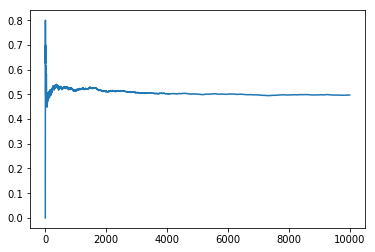

In [168]:
plt.plot(np.array(range(0,10000)), np.array([record.cumsum()[i]/i for i in range(times)]))